# **Investigate Hotel Business using Data Visualization**
---

# Import Library

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read Data

In [3]:
# Read data
link = './Dataset/hotel_bookings_data.csv'
df = pd.read_csv(link)

In [4]:
df.sample(n=5, random_state=100)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
47013,City Hotel,1,13,2018,April,6,3,8,21,1,0.0,0,Breakfast,Kota Cimahi,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,75.36,0,0,Canceled
70144,City Hotel,1,2,2019,August,24,11,1,0,2,0.0,0,No Meal,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,10.0,NaN,0,Personal,100.00,0,0,Canceled
28651,Resort Hotel,0,3,2018,December,41,8,0,1,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Family,90.00,0,0,Check-Out
57362,City Hotel,1,59,2018,November,39,24,1,1,3,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,168.30,0,0,Canceled
88743,City Hotel,0,8,2018,July,20,10,0,2,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,126.00,0,0,Check-Out


# 0. Data Understanding

## 0.1. Features Definition

| Feature Name                   | Feature Description        |
|--------------------------------|----------------------------|
| hotel                          | Type of hotel |
| is_canceled                    | Cancellation status, whether the booking was cancelled (1) or not (0) |
| lead_time                      | Lead time |
| arrival_date_year              | Year of arrival date |
| arrival_date_month             | Month of arrival date |
| arrival_date_week_number       | Week number of year for arrival date |
| arrival_date_day_of_month      | Day of arrival date |
| stays_in_weekend_nights        | Number of weekend nights (Saturday or Sunday) the guest stayed |
| stays_in_weekdays_nights       | Number of weekday nights (Monday to Friday) the guest stayed |
| adults                         | Number of adults     |
| children                       | Number of children |
| babies                         | Number of babies     |
| meal                           | Type of meal booked |
| city                           | City of origin |
| market_segment                 | Market segment designation |
| distribution_channel           | Booking distribution channel |
| is_repeated_guest              | Repeated guest status, whether the booking name was a returning guest (1) or a new guest (0) |
| previous_cancellations         | Number of previous bookings that were cancelled by the customer prior to the current booking |
| previous_bookings_not_canceled | Number of previous bookings that were not cancelled (confirmed) by the customer prior to the current booking |
| booking_changes                | Number of booking changes |
| deposit_type                   | Deposit type |
| agent                          | ID of the travel agency that made the booking |
| company                        | ID of the company that made the booking |
| days_in_waiting_list           | Number of days the booking was in the waiting list before it was confirmed to the customer |
| customer_type                  | Type of booking |
| adr                            | Average daily rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
| required_car_parking_spaces    | Number of car parking spaces required by the customer |
| total_of_special_requests      | Total of special requests made by the customer |
| reservation_status             | Reservation last status |

Referensi: [Hotel booking demand datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191)

## 0.2. Dimensions of the DataFrame

In [5]:
df.shape

(119390, 29)

In [6]:
print('Dataset ini memiliki dimensi data, yaitu')
print('Jumlah baris: {}'.format(df.shape[0]))
print('Jumlah kolom: {}'.format(df.shape[1]))

Dataset ini memiliki dimensi data, yaitu
Jumlah baris: 119390
Jumlah kolom: 29


## 0.3. Data Types of the Features

In [7]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

🔎 Observasi
- Tipe data: float64, int64, dan object.
- Kolom atau fitur `children`, `city`, `agent`, dan `company` memiliki nilai null.

## 0.4. Detect Missing Values

In [8]:
# Check the features that have missing values
print(df.isna().values.any())
df.isna().sum().sort_values(ascending=False)

True


company                           112593
agent                              16340
city                                 488
children                               4
hotel                                  0
is_repeated_guest                      0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
previous_bookings_not_canceled         0
previous_cancellations                 0
market_segment                         0
distribution_channel                   0
is_canceled                            0
meal                                   0
babies                                 0
adults                                 0
stays_in_weekdays_nights               0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_wee

In [9]:
# Summarize missing value
total = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean() * 100, 2).sort_values(ascending=False)

na = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage (%)'])
na = na[na['Total'] > 0]
na.reset_index(inplace=True)
na.rename(columns={'index': 'Feature Name'}, inplace=True)
na

,Feature Name,Total,Percentage (%)
0,company,112593,94.31
1,agent,16340,13.69
2,city,488,0.41
3,children,4,0.00


In [10]:
total_na = df.isna().sum().sum()
total_na

129425

🔎 Observasi
- Fitur-fitur yang memiliki _missing values_: `company`, `agent`, `city`, dan `children`.
- Jumlah data yang kosong pada fitur `company` sebanyak 94,31%, sehingga kita akan _treating_ "null" sebagai nilai unik atau ditampilkan sebagai salah satu kategori.
- Jumlah data yang kosong pada fitur `agent` sebanyak 13,69% atau lebih dari 10%.
- Namun, kita tidak menganggap nilai "null" dalam fitur `company` dan `agent` sebagai nilai yang hilang, tetapi lebih sebagai "not applicable" yang berarti _booking_ tidak dilakukan oleh travel agent atau company.
- Jumlah data yang kosong pada fitur `city` kurang dari 1%, sehingga kita akan isi dengan "Unknown", karena kota tidak diketahui secara pasti.
- Data yang kosong dalam fitur `children` akan diisi dengan nilai nol, karena kita mengasumsikan bahwa customer dengan nilai "null" tidak memiliki anak.

## 0.5. Detect Duplicate Values

In [11]:
# Check the features that have duplicate values
print(df.duplicated().any())
df.duplicated().sum()

True


33261

In [12]:
df.duplicated().value_counts(normalize=True)

False    0.721409
True     0.278591
Name: proportion, dtype: float64

🔎 Observasi
- Jumlah data yang duplikat sebanyak 33.261 baris atau 27,86%, tetapi kita tidak akan melakukan _handling duplicate values_, karena kita berasumsi bahwa data ini merupakan data yang unik.

## 0.6. Number of Unique Classes

In [13]:
# Count number of unique class
df.nunique().sort_values(ascending=False)

adr                               8879
lead_time                          479
company                            352
agent                              333
city                               177
days_in_waiting_list               128
previous_bookings_not_canceled      73
arrival_date_week_number            53
stays_in_weekdays_nights            35
arrival_date_day_of_month           31
booking_changes                     21
stays_in_weekend_nights             17
previous_cancellations              15
adults                              14
arrival_date_month                  12
market_segment                       8
total_of_special_requests            6
distribution_channel                 5
required_car_parking_spaces          5
meal                                 5
children                             5
babies                               5
customer_type                        4
reservation_status                   3
deposit_type                         3
arrival_date_year        

In [14]:
values = {'Feature Name': [], 'Unique Classes': []}
for col in df.columns:
    values['Feature Name'].append(col)
    values['Unique Classes'].append(df[col].unique())
    
unique = pd.DataFrame(values)
unique

,Feature Name,Unique Classes
0,hotel,"[Resort Hotel, City Hotel]"
1,is_canceled,"[0, 1]"
2,lead_time,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68..."
3,arrival_date_year,"[2017, 2018, 2019]"
4,arrival_date_month,"[September, October, November, December, Janua..."
5,arrival_date_week_number,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
6,arrival_date_day_of_month,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,stays_in_weekend_nights,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,..."
8,stays_in_weekdays_nights,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,..."
9,adults,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


In [15]:
undefined = df.applymap(lambda x: 'Undefined' if x == 'Undefined' else '').any()
undefined = undefined[undefined].index.tolist()

print(f"Kolom-kolom dengan nilai 'Undefined': {undefined}")

Kolom-kolom dengan nilai 'Undefined': ['meal', 'market_segment', 'distribution_channel']


In [16]:
df['meal'].value_counts(normalize=True)

meal
Breakfast     0.773180
Dinner        0.121141
No Meal       0.089203
Undefined     0.009791
Full Board    0.006684
Name: proportion, dtype: float64

In [17]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: proportion, dtype: float64

In [18]:
df['distribution_channel'].value_counts(normalize=True)

distribution_channel
TA/TO        0.819750
Direct       0.122665
Corporate    0.055926
GDS          0.001617
Undefined    0.000042
Name: proportion, dtype: float64

🔎 Observasi
- Fitur `hotel` akan diubah namanya menjadi `hotel_type` agar tidak menimbulkan ketidakjelasan atau ambiguitas.
- Selain itu, beberapa fitur lain juga akan diubah namanya, seperti:
    - `is_canceled` → `cancellation_status`,
    - `is_repeated_guest` → `repeated_guest_status`,
    - `arrival_date_year` → `arrival_year`,
    - `arrival_date_month` → `arrival_month`,
    - `arrival_date_week_number` → `arrival_week_number`,
    - `arrival_date_day_of_month` → `arrival_day_of_month`,
    - `previous_cancellations` → `previous_booking_cancellations`,
    - `previous_bookings_not_canceled` → `previous_booking_confirmations`,
    - `agent` → `agent_id`,
    - `company` → `company_id`,
    - `adr` → `average_daily_rate`,
    - `required_car_parking_spaces` → `number_of_parking_spaces_required`.
- Fitur `children`, `agent`, dan `company` seharusnya memiliki tipe data integer.
- Fitur `meal`, `market_segment`, dan `distribution_channel` memiliki kategori "Undefined" dengan persentase kurang dari 1%, sehingga kita akan _mapping_ ke dalam kategori mayoritas atau diklasifikasikan ke dalam kategori tertentu.
- Dalam beberapa kategori, istilah “TA” berarti “Travel Agents” dan “TO” berarti “Tour Operators”.
- Fitur yang menyatakan jumlah tamu atau _guest_, yaitu `adults`, `children`, dan `babies` akan dilakukan analisis lebih lanjut.
- Fitur yang menyatakan jumlah menginap, yaitu `stays_in_weekend_nights` dan `stays_in_weekdays_nights` akan dilakukan analisis lebih lanjut.

## 0.7. Descriptive Statistics

In [19]:
# Statistics for the columns (features)
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3
top,City Hotel,NaN,NaN,NaN,October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Breakfast,Kota Denpasar,Online TA,TA/TO,NaN,NaN,NaN,NaN,No Deposit,NaN,NaN,NaN,Personal,NaN,NaN,NaN,Check-Out
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166
mean,NaN,0.370416,104.011416,2018.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN
min,NaN,0.000000,0.000000,2017.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN
25%,NaN,0.000000,18.000000,2018.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN
50%,NaN,0.000000,69.000000,2018.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN
75%,NaN,1.000000,160.000000,2019.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN


🔎 Observasi
- Fitur `adr` atau average daily rate memiliki nilai negatif dan nilai ekstrem yang menunjukkan anomali atau penyimpangan, sehingga kita akan _dropping_ nilai tersebut.

### Numerical Features

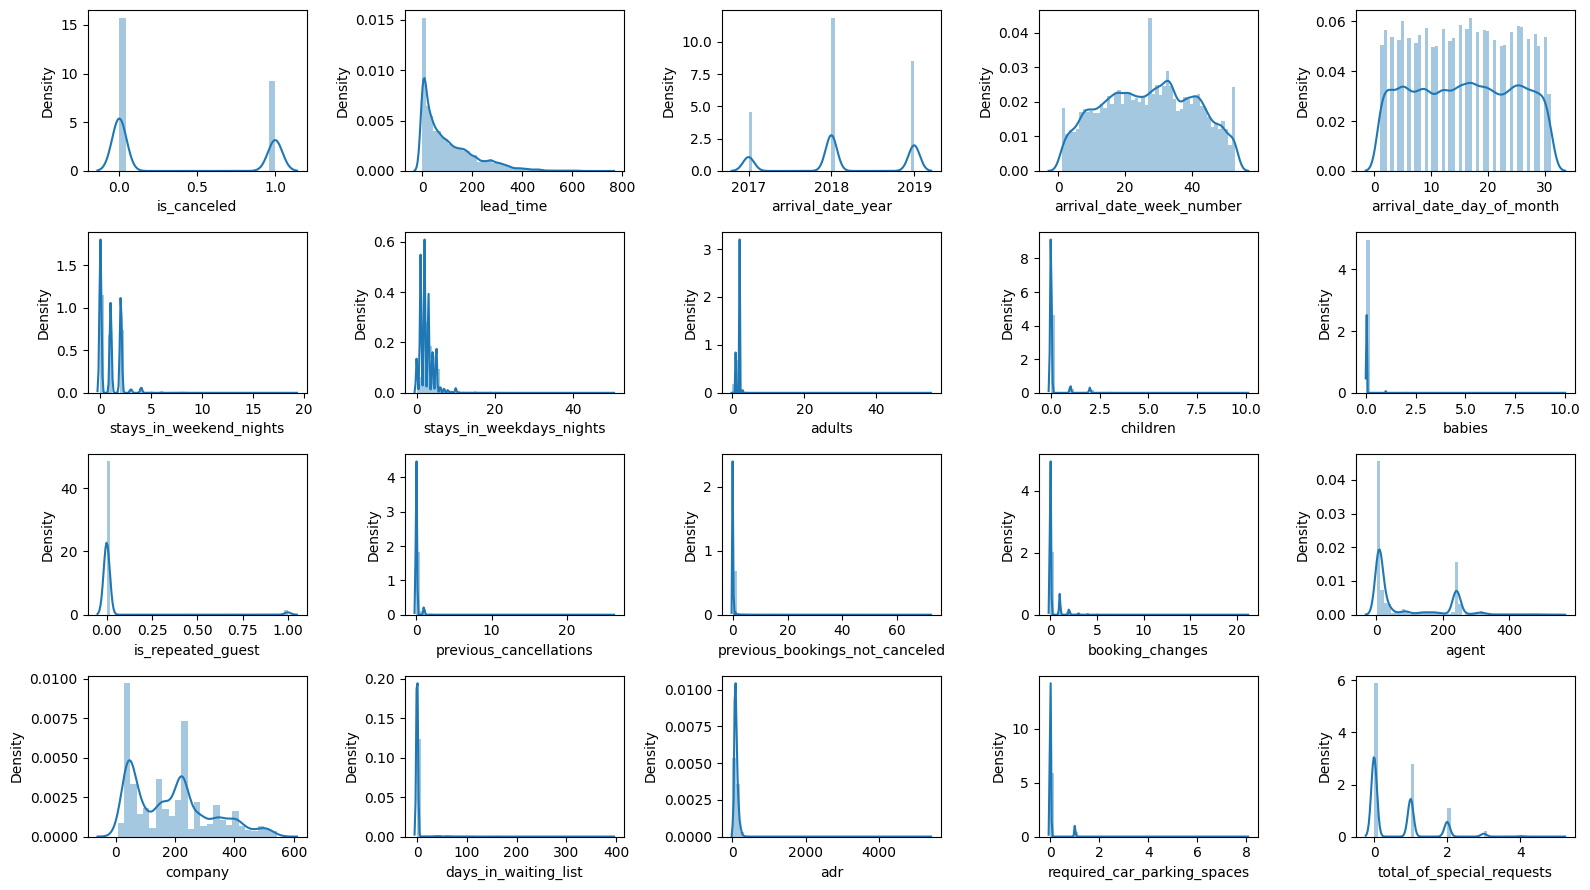

In [20]:
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')].columns.tolist()

plt.figure(figsize=(16, 9))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

🔎 Observasi
- Secara umum, fitur-fitur dalam dataset memiliki distribusi yang cenderung _positive skewness_ atau menceng kanan.
- Fitur `arrival_date_week_number` dan `arrival_date_day_of_month` memiliki distribusi yang cenderung normal.

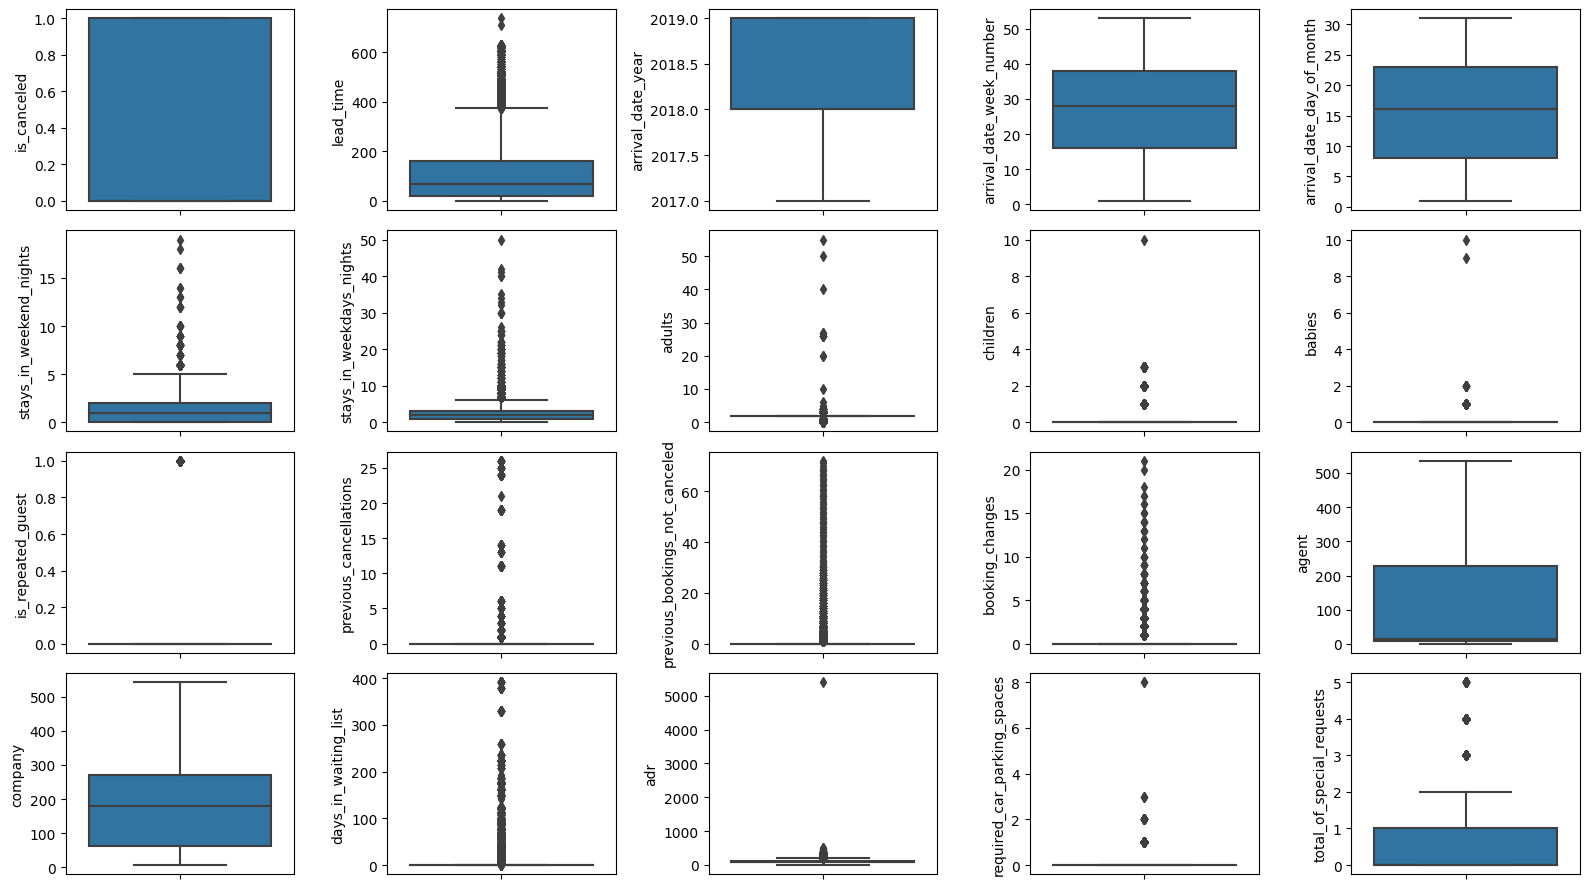

In [21]:
plt.figure(figsize=(16, 9))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

🔎 Observasi
- Secara umum, sebagian besar fitur menunjukkan adanya _outlier_.
- Fitur-fitur seperti `children`, `babies`, `adr`, dan `required_car_parking_spaces` menunjukkan adanya nilai yang ekstrem, sehingga kita akan menghilangkan nilai-nilai ekstrem tersebut agar tidak mengurangi _insight_ yang diperoleh dari analisis data.

### Categorical Features

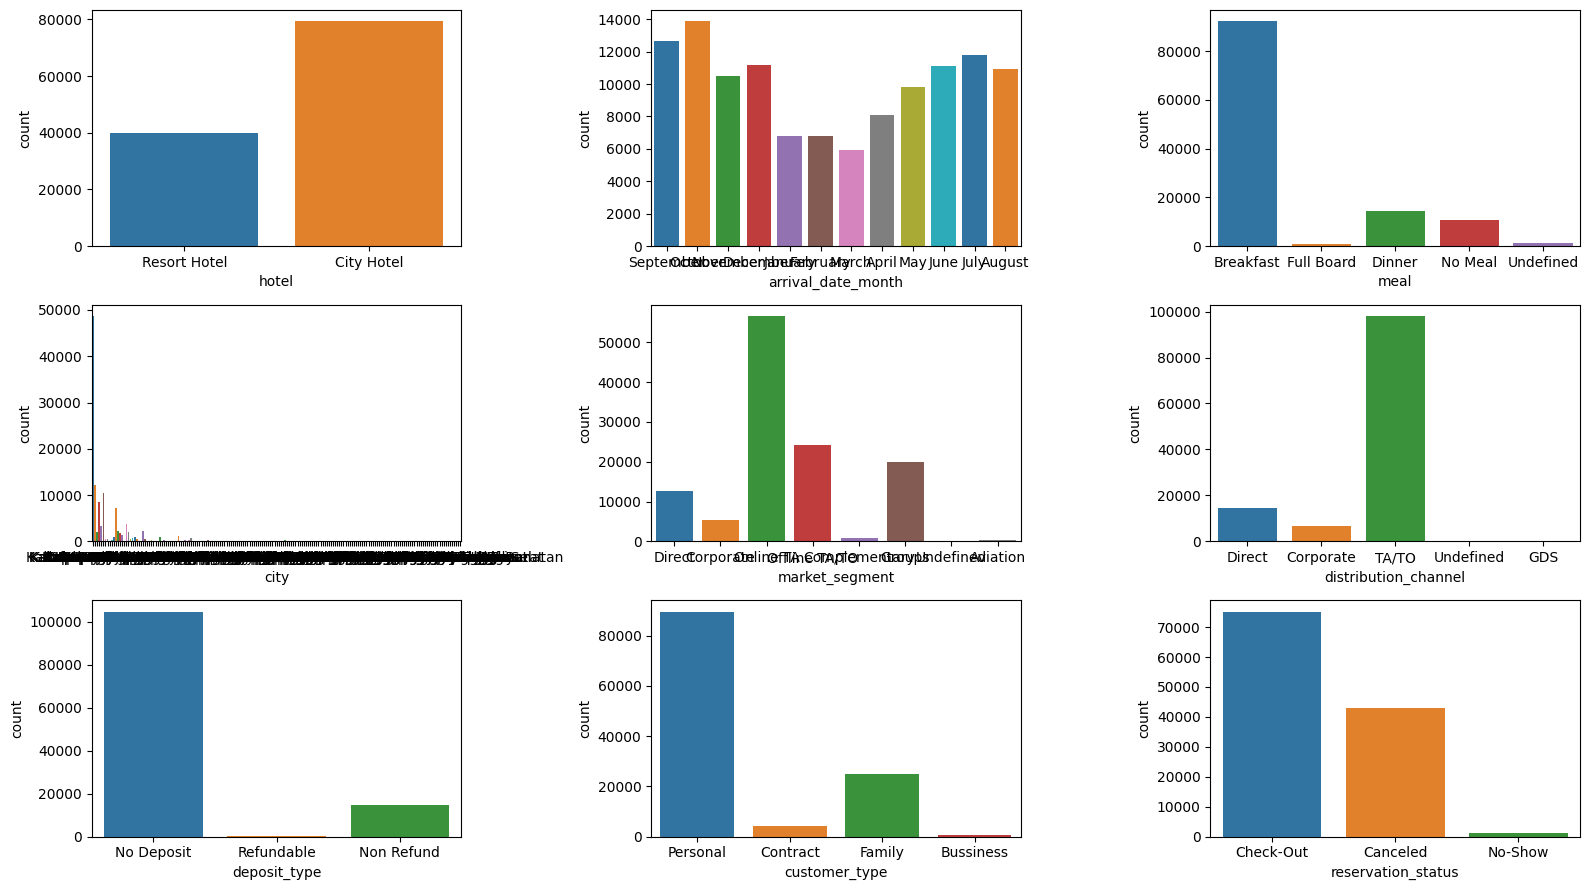

In [22]:
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()

plt.figure(figsize=(16, 9))
for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[cats[i]], palette='tab10')
    plt.tight_layout()

# 1. Data Preprocessing

In [23]:
df_clean = df.copy()

## 1.1. Handling Missing Values

In [24]:
# Filling missing values with zeros
df_clean['children'].fillna(0, inplace=True)
df_clean['agent'].fillna(0, inplace=True)
df_clean['company'].fillna(0, inplace=True)

# Filling missing values with "Unknown"
df_clean['city'].fillna('Unknown', inplace=True)

# Dropping missing values
# df_clean.dropna(subset=['city'], inplace=True)

In [25]:
# Checking missing values
df_clean.isna().sum().sum()

0

✅ Dataset sudah bersih dari _missing values_.

## 1.2. Handling Incorrect and Inconsistent Values

🔽 `meal`

Fitur `meal` dapat dikategorikan menjadi 2, yaitu "Meal" dan "No Meal".
- "**Meal**": 'Breakfast', 'Dinner', 'Full Board'
- "**No Meal**": 'Undefined', 'No Meal'

In [26]:
df_clean['meal'].replace('Undefined', 'No Meal', inplace=True)
df_clean['meal'].replace(['Breakfast', 'Dinner', 'Full Board'], 'Meal', inplace=True)
df_clean['meal'].value_counts(normalize=True)

meal
Meal       0.901005
No Meal    0.098995
Name: proportion, dtype: float64

🔽 `market_segment`

In [27]:
df_clean['market_segment'].replace('Undefined', 'Online TA', inplace=True)
df_clean['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.473063
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Name: proportion, dtype: float64

🔽 `distribution_channel`

In [28]:
df_clean['distribution_channel'].replace('Undefined', 'TA/TO', inplace=True)
df_clean['distribution_channel'].value_counts(normalize=True)

distribution_channel
TA/TO        0.819792
Direct       0.122665
Corporate    0.055926
GDS          0.001617
Name: proportion, dtype: float64

✅ Dataset sudah bebas dari _incorrect values_.

## 1.3. Handling Outliers

🔽 `children`

In [29]:
ch = df_clean[(df_clean['children'] == 10)]
ch

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
328,Resort Hotel,1,55,2017,September,29,12,4,10,2,10.0,0,Meal,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,2,No Deposit,8.0,0.0,0,Contract,133.16,0,1,No-Show


🔽 `babies`

In [30]:
bb = df_clean[(df_clean['babies'] > 2)]
bb

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
46619,City Hotel,0,37,2018,March,3,12,0,2,2,0.0,10,Meal,Kota Denpasar,Online TA,TA/TO,0,0,0,1,No Deposit,9.0,0.0,0,Personal,84.45,0,1,Check-Out
78656,City Hotel,0,11,2017,December,42,11,2,1,1,0.0,9,Meal,Kabupaten Bangka,Corporate,Corporate,0,0,0,1,No Deposit,95.0,0.0,0,Family,95.00,0,0,Check-Out


🔽 `adr`

In [31]:
adr = df_clean[(df_clean['adr'] < 0) | (df_clean['adr'] > 450)]
adr

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
14969,Resort Hotel,0,195,2019,May,10,5,4,6,2,0.0,0,Meal,Kabupaten Bangka,Groups,Direct,1,0,2,2,No Deposit,273.0,0.0,0,Family,-6.38,0,0,Check-Out
15083,Resort Hotel,0,1,2017,September,29,15,0,1,2,0.0,0,Meal,Kota Denpasar,Corporate,Corporate,1,0,1,0,No Deposit,0.0,0.0,0,Personal,508.00,1,0,Check-Out
48515,City Hotel,1,35,2018,May,13,25,0,1,2,0.0,0,Meal,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,1,Non Refund,12.0,0.0,0,Personal,5400.00,0,0,Canceled
103912,City Hotel,0,81,2018,February,53,31,1,1,2,2.0,0,Meal,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,0.0,0.0,0,Family,451.50,0,4,Check-Out
111403,City Hotel,0,0,2019,July,19,9,0,1,1,0.0,0,Meal,Kabupaten Kepulauan Seribu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,159.0,0.0,0,Personal,510.00,0,0,Check-Out


🔽 `required_car_parking_spaces`

In [32]:
cps = df_clean[(df_clean['required_car_parking_spaces'] == 8)]
cps

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
29045,Resort Hotel,0,26,2019,May,11,14,0,5,2,0.0,0,Meal,Kabupaten Garut,Direct,Corporate,1,0,2,1,No Deposit,0.0,0.0,0,Family,40.0,8,1,Check-Out
29046,Resort Hotel,0,138,2019,May,12,19,2,2,2,0.0,0,Meal,Kabupaten Garut,Direct,Corporate,1,0,2,1,No Deposit,0.0,0.0,122,Family,80.0,8,0,Check-Out


In [33]:
df_clean.drop(ch.index, inplace=True)
df_clean.drop(bb.index, inplace=True)
df_clean.drop(adr.index, inplace=True)
df_clean.drop(cps.index, inplace=True)

## 1.4. Fixing Data Type

In [34]:
df_clean['children'] = df_clean['children'].astype('int64')
df_clean['agent'] = df_clean['agent'].astype('int64')
df_clean['company'] = df_clean['company'].astype('int64')

## 1.5. Renaming Features

In [35]:
df_clean.rename(columns={
    'hotel'                         : 'hotel_type',
    'is_canceled'                   : 'cancellation_status',
    'is_repeated_guest'             : 'repeated_guest_status',
    'arrival_date_year'             : 'arrival_year',
    'arrival_date_month'            : 'arrival_month',
    'arrival_date_week_number'      : 'arrival_week_number',
    'arrival_date_day_of_month'     : 'arrival_day_of_month',
    'stays_in_weekdays_nights'      : 'stays_in_weekday_nights',
    'previous_cancellations'        : 'previous_booking_cancellations',
    'previous_bookings_not_canceled': 'previous_booking_confirmations',
    'agent'                         : 'agent_id',
    'company'                       : 'company_id',
    'adr'                           : 'average_daily_rate',
    'required_car_parking_spaces'   : 'number_of_parking_spaces_required',
    'total_of_special_requests'     : 'number_of_special_requests'
}, inplace=True)

In [36]:
df_clean.columns

Index(['hotel_type', 'cancellation_status', 'lead_time', 'arrival_year',
       'arrival_month', 'arrival_week_number', 'arrival_day_of_month',
       'stays_in_weekend_nights', 'stays_in_weekday_nights', 'adults',
       'children', 'babies', 'meal', 'city', 'market_segment',
       'distribution_channel', 'repeated_guest_status',
       'previous_booking_cancellations', 'previous_booking_confirmations',
       'booking_changes', 'deposit_type', 'agent_id', 'company_id',
       'days_in_waiting_list', 'customer_type', 'average_daily_rate',
       'number_of_parking_spaces_required', 'number_of_special_requests',
       'reservation_status'],
      dtype='object')

## 1.6. Removing Irrelevant Data

🔽 `total_guest`

In [37]:
# Creating a new feature 'total_guest'
df_clean['total_guest'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']

# Checking irrelevant data
df_clean.loc[df_clean['total_guest'] == 0].shape[0]

180

🔎 Observasi
- Dataset memiliki 180 baris dengan jumlah tamu yang menginap = 0.
- Jika `total_guest` memiliki nilai 0, hal ini menunjukkan kemungkinan adanya kesalahan dalam penginputan data. Kehadiran tamu yang valid akan memiliki nilai minimal 1, dan keberadaan nilai 0 dapat dianggap sebagai data yang tidak valid serta tidak memberikan informasi yang berguna untuk analisis atau pemodelan selanjutnya.
- Data ini akan dihapus, karena dapat meningkatkan kualitas data dan keandalan analisis yang dilakukan.

🔽 `stay_duration`

In [38]:
# Creating a new feature 'stay_duration'
df_clean['stay_duration'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_weekday_nights']

# Checking irrelevant data
df_clean.loc[df_clean['stay_duration'] == 0].shape[0]

715

🔎 Observasi
- Dataset memiliki 715 baris dengan jumlah menginap = 0.
- Jika `stay_duration` memiliki nilai 0, hal ini mungkin mengindikasikan bahwa tamu memang menginap di hotel, tetapi durasinya sangat singkat. Meskipun demikian, data ini masih valid dan dapat memberikan informasi tentang tamu yang melakukan kunjungan singkat atau kegiatan lain di hotel.
- Data ini akan tetap dipertahankan, karena dapat memberikan keragaman informasi yang berguna untuk analisis lebih lanjut.

In [39]:
# Removing irrelevant data with 0 guest
df_clean = df_clean[df_clean['total_guest'] != 0].reset_index(drop=True)

print(f'Jumlah baris (sesudah data cleaning): {df_clean.shape[0]}')

Jumlah baris (sesudah data cleaning): 119200


✅ Dataset sudah bebas dari _irrelevant data_.

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119200 entries, 0 to 119199
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   hotel_type                         119200 non-null  object 
 1   cancellation_status                119200 non-null  int64  
 2   lead_time                          119200 non-null  int64  
 3   arrival_year                       119200 non-null  int64  
 4   arrival_month                      119200 non-null  object 
 5   arrival_week_number                119200 non-null  int64  
 6   arrival_day_of_month               119200 non-null  int64  
 7   stays_in_weekend_nights            119200 non-null  int64  
 8   stays_in_weekday_nights            119200 non-null  int64  
 9   adults                             119200 non-null  int64  
 10  children                           119200 non-null  int64  
 11  babies                             1192

✅ Dataset ini telah diverifikasi sebagai dataset yang akurat.

# Export the Clean Dataset

In [41]:
df_clean.to_csv(r'clean_hotel_bookings.csv', index=False)

# 2. Data Visualization

In [42]:
dv = df_clean.copy()

In [43]:
dv['cancellation_status'].value_counts(normalize=True)

cancellation_status
0    0.62922
1    0.37078
Name: proportion, dtype: float64

In [44]:
# Define features
features = ['lead_time', 'previous_booking_cancellations', 'previous_booking_confirmations', 'booking_changes', 'days_in_waiting_list', 'number_of_special_requests']

# Group the mean of the features by 'cancellation_status'
dv.groupby('cancellation_status')[features].mean()

,lead_time,previous_booking_cancellations,previous_booking_confirmations,booking_changes,days_in_waiting_list,number_of_special_requests
cancellation_status,,,,,,
0,80.084050,0.015759,0.202992,0.289722,1.58623,0.714451
1,144.890784,0.208430,0.025137,0.098265,3.56626,0.328891


## Monthly Hotel Booking Analysis Based on Hotel Type

#### Persentase Total Pemesanan Hotel

In [45]:
dv['hotel_type'].value_counts(normalize=True)

hotel_type
City Hotel      0.664077
Resort Hotel    0.335923
Name: proportion, dtype: float64

In [46]:
# Summary persentase total hotel booking
hotel_type = dv.groupby('hotel_type')[['hotel_type']].count()
hotel_type.columns = ['total']
hotel_type.reset_index(inplace=True)
hotel_type['percentage'] = round(hotel_type['total'] / hotel_type['total'].sum() * 100, 3)
hotel_type

,hotel_type,total,percentage
0,City Hotel,79158,66.408
1,Resort Hotel,40042,33.592


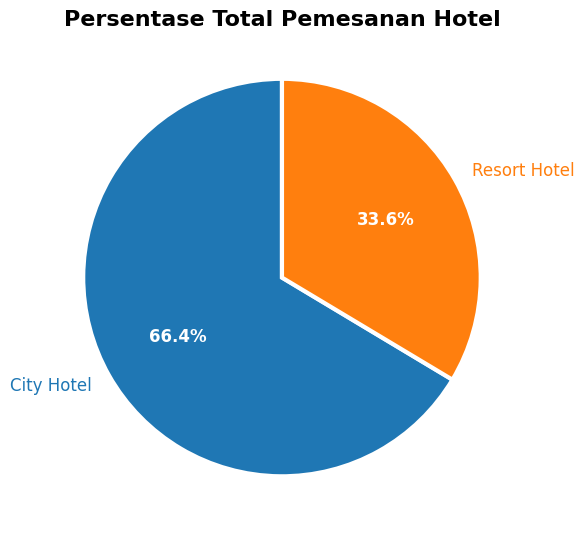

In [47]:
fig, ax = plt.subplots(figsize=(6, 6))
patches, texts, pcts = ax.pie(
    hotel_type['total'],
    labels=hotel_type['hotel_type'],
    autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    colors=['tab:blue', 'tab:orange'],
    startangle=90)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=400)
ax.set_title('Persentase Total Pemesanan Hotel', fontsize=16, pad=2, loc='center', fontweight='bold')
plt.tight_layout()
plt.show()

🔎 Insights
- Mayoritas pelanggan yang melakukan pemesanan hotel memilih City Hotel, dengan persentase sebesar 66,4%, sedangkan 33,6% sisanya memilih Resort Hotel.

#### Perbandingan Total Pemesanan Hotel per Bulan

In [48]:
# Summary dari aggregasi total booking per month
monthly_booking = dv.groupby(['hotel_type', 'arrival_month'])['arrival_year'].agg(['nunique', 'count']).reset_index()

In [49]:
# Sort by month
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_booking['month'] = monthly_booking['arrival_month'].str[:3]
monthly_booking['month'] = pd.Categorical(monthly_booking['month'], categories=months)
monthly_booking = monthly_booking.sort_values(['month', 'hotel_type']).reset_index(drop=True)
monthly_booking

,hotel_type,arrival_month,nunique,count,month
0,City Hotel,January,2,4336,Jan
1,Resort Hotel,January,2,2435,Jan
2,City Hotel,February,2,4113,Feb
3,Resort Hotel,February,2,2645,Feb
4,City Hotel,March,2,3729,Mar
5,Resort Hotel,March,2,2191,Mar
6,City Hotel,April,2,4950,Apr
7,Resort Hotel,April,2,3102,Apr
8,City Hotel,May,2,6433,May
9,Resort Hotel,May,2,3331,May


🔽 `September` dan `October`
- Terlihat bahwa sebagian besar bulan dalam dataset memiliki jumlah unik 2, kecuali bulan September dan Oktober.
- Untuk mengatasi permasalahan ini, dilakukan normalisasi dengan menghitung rerata (count/nunique) sebagai langkah penyelesaiannya.

#### Normalization

In [50]:
monthly_booking['average'] = round(monthly_booking['count']/monthly_booking['nunique'])
monthly_booking = monthly_booking[['hotel_type', 'month', 'average']]
monthly_booking

,hotel_type,month,average
0,City Hotel,Jan,2168.0
1,Resort Hotel,Jan,1218.0
2,City Hotel,Feb,2056.0
3,Resort Hotel,Feb,1322.0
4,City Hotel,Mar,1864.0
5,Resort Hotel,Mar,1096.0
6,City Hotel,Apr,2475.0
7,Resort Hotel,Apr,1551.0
8,City Hotel,May,3216.0
9,Resort Hotel,May,1666.0


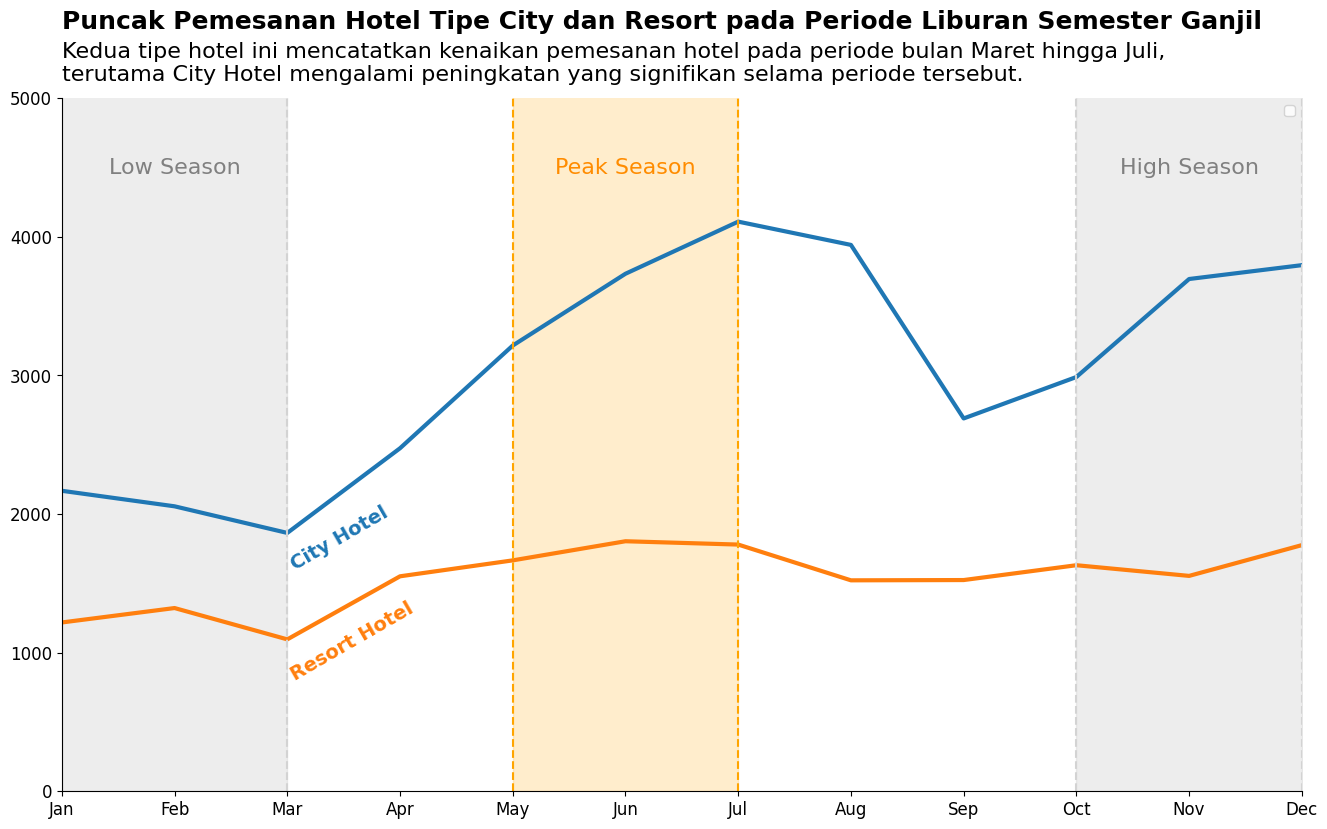

In [51]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
sns.despine()

# Plot
sns.lineplot(x='month', y='average', hue='hotel_type', data=monthly_booking, linewidth=3, palette='tab10')
plt.xlim(0, 11)
plt.ylim(0, 5000)

# Title
plt.title('Puncak Pemesanan Hotel Tipe City dan Resort pada Periode Liburan Semester Ganjil',
          loc='left', fontsize=18, fontweight='bold', pad=50)
plt.text(x=0, y=5250,
         s='Kedua tipe hotel ini mencatatkan kenaikan pemesanan hotel pada periode bulan Maret hingga Juli,\nterutama City Hotel mengalami peningkatan yang signifikan selama periode tersebut.',
         fontsize=16, ha='left', va='center')

# Label
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylabel('')
plt.xlabel('')

# Highlight
# Low Season
plt.axvline(0, color='lightgray', linestyle='--', ymax=1, ymin=0)
plt.axvline(2, color='lightgray', linestyle='--', ymax=1, ymin=0)
plt.stackplot(np.arange(0, 3), [5500], color='darkgray', alpha=0.2)
plt.text(x=1, y=4500, s='Low Season', va='center', ha='center', fontsize=16, color='gray')

# Peak Season
plt.axvline(4, color='orange', linestyle='--', ymax=1, ymin=0)
plt.axvline(6, color='orange', linestyle='--', ymax=1, ymin=0)
plt.stackplot(np.arange(4, 7), [5500], color='orange', alpha=0.2)
plt.text(x=5, y=4500, s='Peak Season', va='center', ha='center', fontsize=16, color='darkorange')

# High Season
plt.axvline(9, color='lightgray', linestyle='--', ymax=1, ymin=0)
plt.axvline(11, color='lightgray', linestyle='--', ymax=1, ymin=0)
plt.stackplot(np.arange(9, 12), [5500], color='darkgray', alpha=0.2)
plt.text(x=10, y=4500, s='High Season', va='center', ha='center', fontsize=16, color='gray')

# Legend
plt.legend([])
plt.text(x=2, y=1600, s='City Hotel', rotation=30, fontsize=14, color='tab:blue', ha='left', fontweight='bold')
plt.text(x=2, y=800, s='Resort Hotel', rotation=30, fontsize=14, color='tab:orange', ha='left', fontweight='bold')

plt.show()

Referensi: [Musim Libur Low, High, dan Peak Season](https://bobobox.com/blog/istilah-musim-libur-low-high-peak-season/)

🔎 Insights
- Selama musim liburan, pemesanan hotel cenderung meningkat.
- Pemesanan hotel tipe City maupun Resort mencapai puncaknya pada periode liburan semester ganjil: bulan Mei hingga Juli, terutama City Hotel mengalami peningkatan yang signifikan selama periode tersebut.
- Tingkat pemesanan terendah terjadi pada periode bulan Januari hingga Maret.

## Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rate

#### Persentase Total Cancellation Rate

🔽 `City Hotel`

In [52]:
city = dv[dv['hotel_type'] == 'City Hotel']

# Group by 'cancellation_status'
cancel_ch = city.groupby('cancellation_status')[['cancellation_status']].count()
cancel_ch.columns = ['total']
cancel_ch.reset_index(inplace=True)

map = {0: 'Not Cancelled',
       1: 'Cancelled'}
cancel_ch['cancellation_status'] = cancel_ch['cancellation_status'].map(map)
cancel_ch

,cancellation_status,total
0,Not Cancelled,46080
1,Cancelled,33078


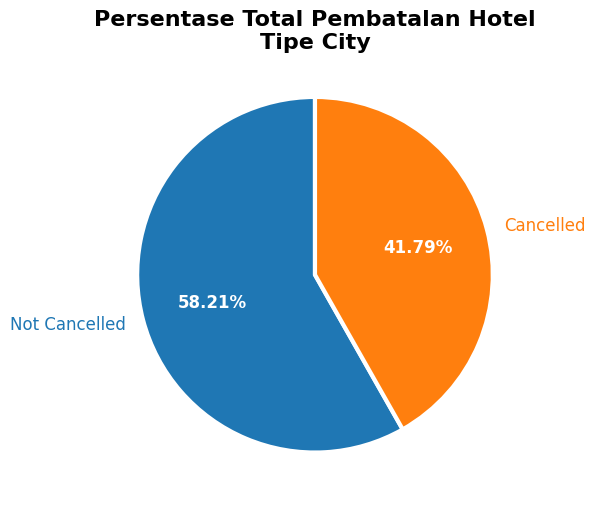

In [53]:
fig, ax = plt.subplots(figsize=(6, 6))
patches, texts, pcts = ax.pie(
    cancel_ch['total'],
    labels=cancel_ch['cancellation_status'],
    autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    colors=['tab:blue', 'tab:orange'],
    startangle=90)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=400)
ax.set_title('Persentase Total Pembatalan Hotel\nTipe City', fontsize=16, pad=2, loc='center', fontweight='bold')
plt.tight_layout()
plt.show()

🔽 `Resort Hotel`

In [54]:
resort = dv[dv['hotel_type'] == 'Resort Hotel']

# Group by 'cancellation_status'
cancel_rh = resort.groupby('cancellation_status')[['cancellation_status']].count()
cancel_rh.columns = ['total']
cancel_rh.reset_index(inplace=True)

map = {0: 'Not Cancelled',
       1: 'Cancelled'}
cancel_rh['cancellation_status'] = cancel_rh['cancellation_status'].map(map)
cancel_rh

,cancellation_status,total
0,Not Cancelled,28923
1,Cancelled,11119


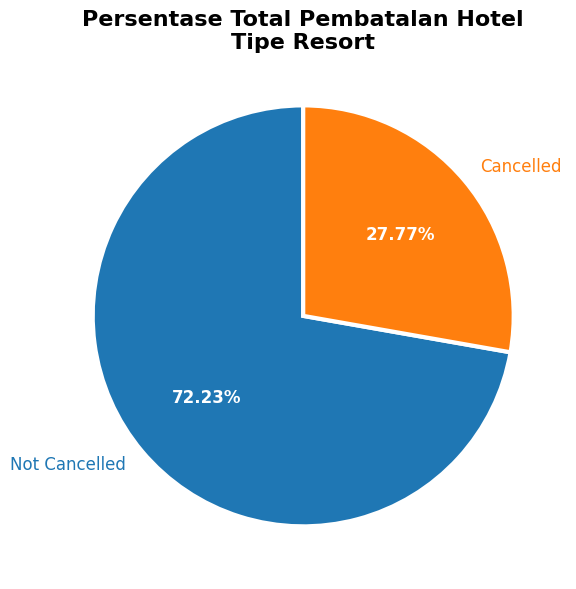

In [55]:
fig, ax = plt.subplots(figsize=(6, 6))
patches, texts, pcts = ax.pie(
    cancel_rh['total'],
    labels=cancel_rh['cancellation_status'],
    autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    colors=['tab:blue', 'tab:orange'],
    startangle=90)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=400)
ax.set_title('Persentase Total Pembatalan Hotel\nTipe Resort', fontsize=16, pad=2, loc='center', fontweight='bold')
plt.tight_layout()
plt.show()

🔎 Insights
- Presentase tingkat pembatalan City Hotel lebih tinggi daripada Resort Hotel.
- Pelanggan yang memesan City Hotel cenderung lebih sering membatalkan pesanan mereka.

In [56]:
dv['stay_duration'].describe()

count    119200.000000
mean          3.426174
std           2.540502
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: stay_duration, dtype: float64

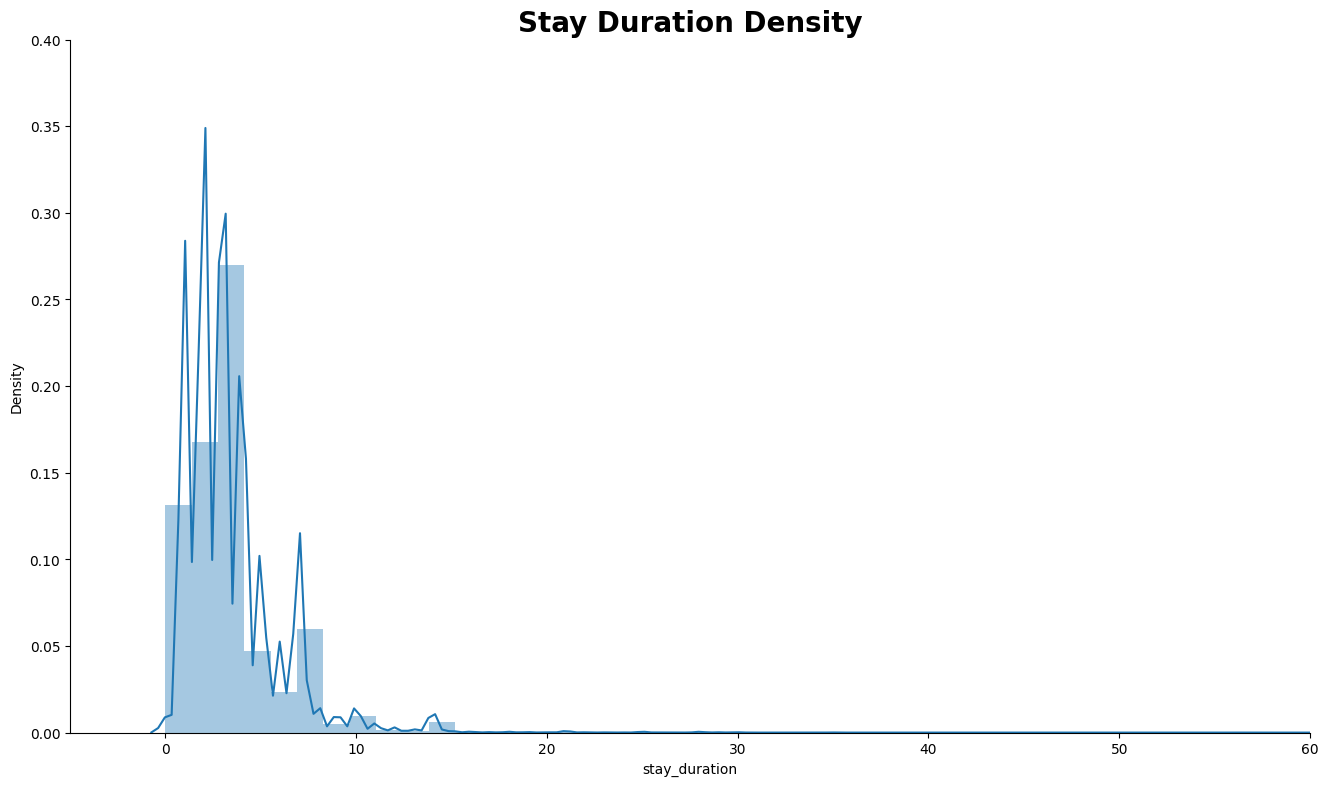

In [57]:
plt.figure(figsize=(16, 9))
sns.distplot(dv['stay_duration'])
sns.despine()
plt.title('Stay Duration Density', weight='bold', fontsize=20)
plt.xlim(-5, 60)
plt.ylim(0, 0.4)
plt.show()

In [58]:
unik = dv['stay_duration'].nunique()
max = dv['stay_duration'].max()
min = dv['stay_duration'].min()

print('Nilai unik:', unik)
print('Max durasi:', max)
print('Min durasi:', min)

Nilai unik: 42
Max durasi: 69
Min durasi: 0


🔎 Insights
- Durasi menginap pelanggan berada di antara 0 hingga 69 hari. Agar lebih mudah diinterpretasikan, durasi ini akan dikategorikan dalam rentang per pekan:
    - < 1 : 0 s.d. 7 hari
    - 1-2 : 8 s.d. 14 hari
    - 2-3 : 15 s.d. 21 hari
    - 2-4 : 22 s.d. 28 hari
    - \> 4 : > 28 hari

#### Cancellation Rate by Stay Duration

In [59]:
dv['stay_week'] = dv['stay_duration'].apply(lambda value:
                                            '< 1' if value < 8 else(
                                                '1-2' if value < 15 else (
                                                    '2-3' if value < 22 else (
                                                        '3-4' if value < 29 else '> 4'))))
dv['stay_week'].value_counts()

stay_week
< 1    113976
1-2      4795
2-3       274
3-4       108
> 4        47
Name: count, dtype: int64

In [60]:
cancel = dv[dv['cancellation_status'] == 1].groupby(['hotel_type', 'stay_week']).aggregate({'cancellation_status' : 'count'}).reset_index()
confirm = dv[dv['cancellation_status'] == 0].groupby(['hotel_type', 'stay_week']).aggregate({'cancellation_status' : 'count'}).reset_index()
cancel['cancellation_rate'] = (cancel['cancellation_status'] / (cancel['cancellation_status'] + confirm['cancellation_status']) * 100).round(2)

In [61]:
# Sort by week
weeks = ['< 1', '1-2', '2-3', '3-4', '> 4']

cancel['stay_week'] = pd.Categorical(cancel['stay_week'], categories=weeks)
cancel = cancel.sort_values(['stay_week', 'hotel_type']).reset_index(drop=True)
cancel

,hotel_type,stay_week,cancellation_status,cancellation_rate
0,City Hotel,< 1,32403,41.58
1,Resort Hotel,< 1,9917,27.52
2,City Hotel,1-2,558,52.20
3,Resort Hotel,1-2,1077,28.90
4,City Hotel,2-3,76,72.38
5,Resort Hotel,2-3,79,46.75
6,City Hotel,3-4,21,84.00
7,Resort Hotel,3-4,39,46.99
8,City Hotel,> 4,20,90.91
9,Resort Hotel,> 4,7,28.00


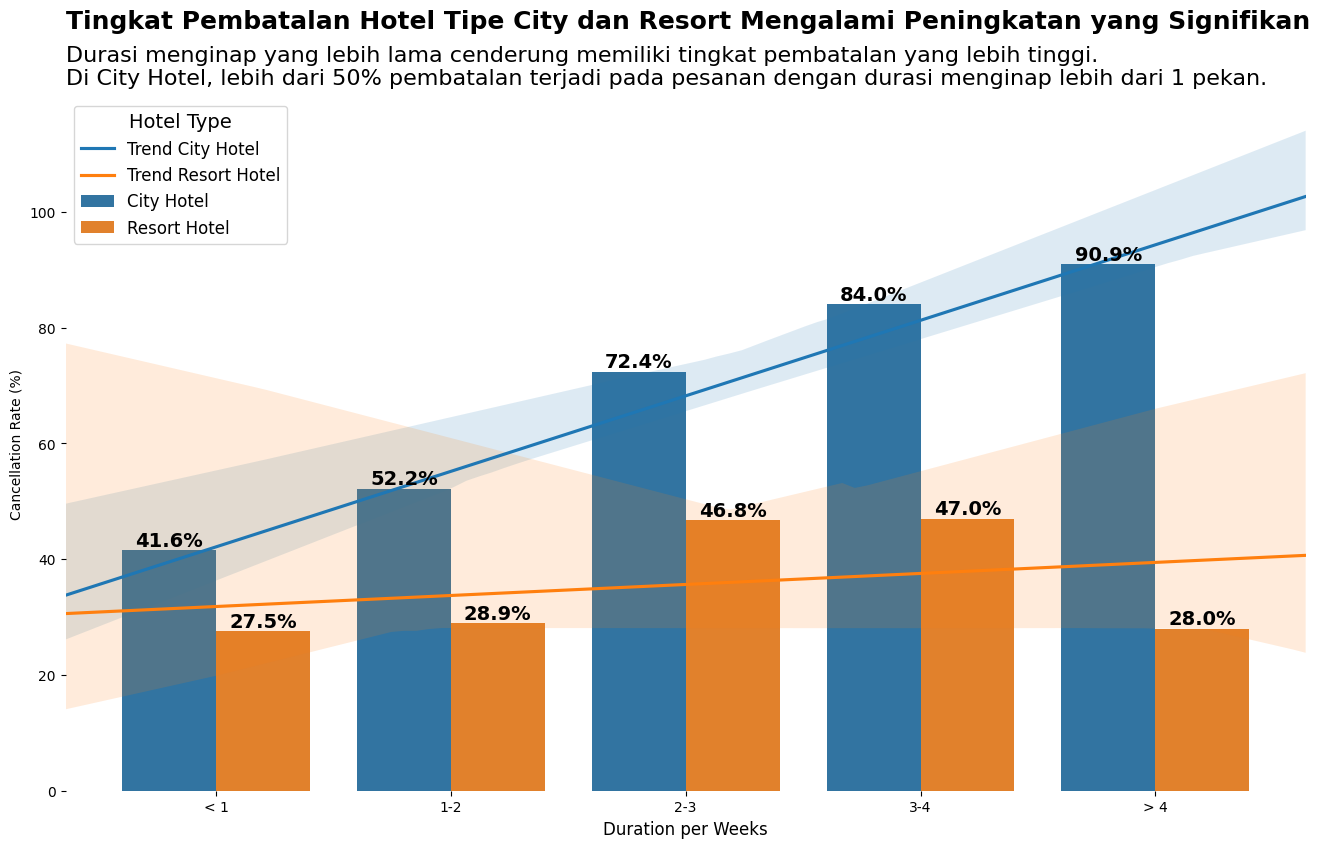

In [62]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
# sns.despine()

ax = sns.barplot(x='stay_week',
                 y='cancellation_rate',
                 hue='hotel_type',
                 hue_order = ['City Hotel', 'Resort Hotel'],
                 data=cancel,
                 palette='tab10')

for c in ax.patches:
    c.set_zorder(0)
sns.regplot(x=np.arange(0, len(cancel[cancel['hotel_type'] == 'City Hotel'])),
            y='cancellation_rate', 
            data=cancel[cancel['hotel_type'] == 'City Hotel'], scatter=False, label='Trend City Hotel', truncate=False)
sns.regplot(x=np.arange(0, len(cancel[cancel['hotel_type'] == 'City Hotel'])),
            y='cancellation_rate', 
            data=cancel[cancel['hotel_type'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)

# Title
plt.title('Tingkat Pembatalan Hotel Tipe City dan Resort Mengalami Peningkatan yang Signifikan',
          fontsize=18, fontweight='bold', loc='left', pad=50)
plt.text(x=-0.6375, y=125,
         s='Durasi menginap yang lebih lama cenderung memiliki tingkat pembatalan yang lebih tinggi.\nDi City Hotel, lebih dari 50% pembatalan terjadi pada pesanan dengan durasi menginap lebih dari 1 pekan.',
         fontsize=16, ha='left', va='center')

# Label
plt.xticks(range(0, 5, 1))
plt.xlabel('Duration per Weeks', fontsize=12)
plt.ylabel('Cancellation Rate (%)')
plt.bar_label(ax.containers[0], fmt='%.1f%%', fontsize=14, fontweight='bold')
plt.bar_label(ax.containers[1], fmt='%.1f%%', fontsize=14, fontweight='bold')

# Legend
plt.legend(title='Hotel Type', title_fontsize=14, prop={'size':12})

plt.show()

🔎 Insights
- Tingkat pembatalan pesanan hotel meningkat seiring dengan durasi menginap yang lebih lama pada kedua tipe hotel.
- Di City Hotel, pesanan dengan durasi menginap lebih dari 1 pekan memiliki tingkat pembatalan lebih dari 50%.
- Di Resort Hotel, durasi menginap lebih dari 4 pekan memiliki tingkat pembatalan cukup rendah dibandingkan yang lain.

## Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

#### Duration of Lead Time

In [63]:
dv['lead_time'].describe()

count    119200.000000
mean        104.113104
std         106.877661
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

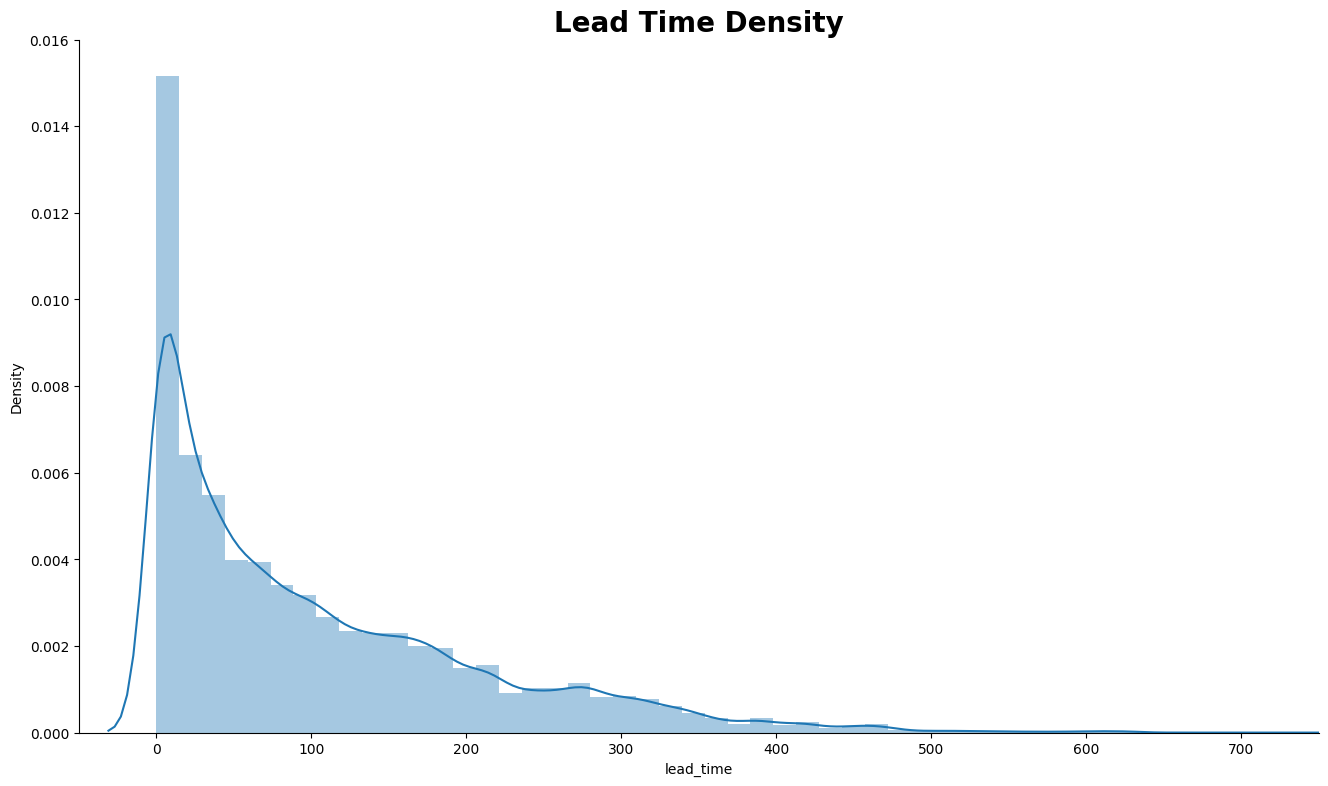

In [64]:
plt.figure(figsize=(16, 9))
sns.distplot(dv['lead_time'])
sns.despine()
plt.title('Lead Time Density', weight='bold', fontsize=20)
plt.xlim(-50, 750)
plt.ylim(0, 0.016)
plt.show()

In [65]:
unik = dv['lead_time'].nunique()
max = dv['lead_time'].max()
min = dv['lead_time'].min()

print('Nilai unik:', unik)
print('Max durasi:', max)
print('Min durasi:', min)

Nilai unik: 479
Max durasi: 737
Min durasi: 0


🔎 Insights
- Waktu tunggu pelanggan berada di antara 0 hingga 737 hari. Agar lebih mudah diinterpretasikan, durasi ini akan dikategorikan dalam rentang per bulan.

#### Cancellation Rate by Lead Time

In [66]:
dv['lead_time_group'] = pd.cut(dv['lead_time'],
                               bins=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, np.inf],
                               labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '> 12'])
dv['lead_time_group'].value_counts()

lead_time_group
1       32313
2       16949
3       12576
4       10429
5        8136
6        7854
7        5658
8        4309
10       3425
> 12     3415
9        3403
11       2755
12       1715
Name: count, dtype: int64

In [67]:
lead_cancel = dv.groupby(['hotel_type', 'lead_time_group']).aggregate({'cancellation_status' : 'sum',
                                                                       'arrival_day_of_month' : 'count'}).reset_index()
lead_cancel['cancellation_rate'] = (lead_cancel['cancellation_status'] / (lead_cancel['arrival_day_of_month']) * 100).round(2)

In [68]:
# Sort by month
labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '> 12']

lead_cancel['lead_time_group'] = pd.Categorical(lead_cancel['lead_time_group'], categories=labels)
lead_cancel = lead_cancel.sort_values(['lead_time_group', 'hotel_type']).reset_index(drop=True)
lead_cancel

,hotel_type,lead_time_group,cancellation_status,arrival_day_of_month,cancellation_rate
0,City Hotel,1,4922,20212,24.35
1,Resort Hotel,1,1829,12101,15.11
2,City Hotel,2,4607,11872,38.81
3,Resort Hotel,2,1565,5077,30.83
4,City Hotel,3,3692,8901,41.48
5,Resort Hotel,3,1275,3675,34.69
6,City Hotel,4,3486,7442,46.84
7,Resort Hotel,4,1159,2987,38.80
8,City Hotel,5,2542,5606,45.34
9,Resort Hotel,5,1032,2530,40.79


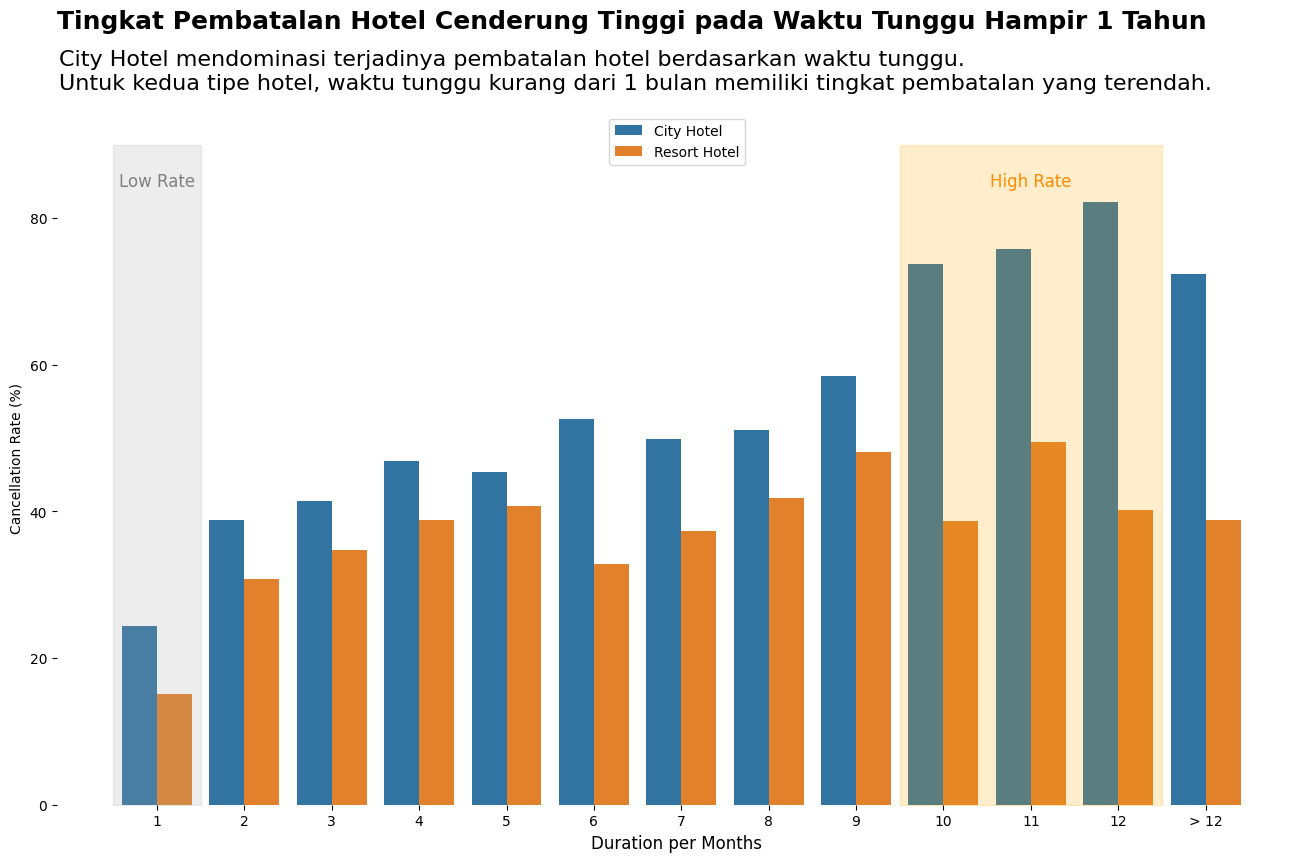

In [69]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)

ax = sns.barplot(x='lead_time_group',
                 y='cancellation_rate',
                 hue='hotel_type',
                 hue_order = ['City Hotel', 'Resort Hotel'],
                 data=lead_cancel,
                 palette='tab10')

# Title
plt.title('Tingkat Pembatalan Hotel Cenderung Tinggi pada Waktu Tunggu Hampir 1 Tahun',
          fontsize=18, fontweight='bold', loc='left', pad=60)
plt.text(x=-1.125, y=100,
         s='City Hotel mendominasi terjadinya pembatalan hotel berdasarkan waktu tunggu.\nUntuk kedua tipe hotel, waktu tunggu kurang dari 1 bulan memiliki tingkat pembatalan yang terendah.',
         fontsize=16, ha='left', va='center')

# Highlight
plt.stackplot([-0.5, 0.5], [90], color='darkgray', alpha=0.2)
plt.text(x=0, y=85, s='Low Rate', va='center', ha='center', fontsize=12, color='gray')

plt.stackplot([8.5, 11.5], [90], color='orange', alpha=0.2)
plt.text(x=10, y=85, s='High Rate', va='center', ha='center', fontsize=12, color='darkorange')

# Label
plt.xlabel('Duration per Months', fontsize=12)
plt.ylabel('Cancellation Rate (%)')
# plt.bar_label(ax.containers[0], fmt='%.1f%%', fontsize=10, fontweight='bold')
# plt.bar_label(ax.containers[1], fmt='%.1f%%', fontsize=10, fontweight='bold')

# Legend
plt.legend(loc='upper center')
plt.show()

🔎 Insights
- Tingkat pembatalan didominasi oleh City Hotel berdasarkan waktu tunggu.
- Tingkat pembatalan cenderung tinggi pada waktu tunggu hampir satu tahun.
- Tingkat pembatalan yang rendah pada waktu tunggu kurang dari satu bulan.